<a href="https://colab.research.google.com/github/sonudhakane7526/CodersCave_DS_Internship_Tasks/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHASE 1 TASK**

---



# **Project Name - Choose a dataset with a time component and perform time series analysis (Golden Task)**

**Contribution** - Individual

**Intern Name** - Vikas A. Dhakane

**Allocated Project** - Phase-1) Golden Task  

# **1. Understanding datasets by importing libraries**

# Step 1: Data Collection

In [96]:
# Importing the required libraries
import pandas as pd # data processing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure

In [97]:
# Assuming your dataset is stored in a CSV file named 'portfolio_data.csv'
file_path = 'portfolio_data.csv'

In [98]:
# Reading the dataset into a DataFrame
portfolio_data = pd.read_csv(file_path)

In [99]:
# Converting 'Date' column to datetime object
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'])

# Step 2: Exploratory Data Analysis (EDA)

In [10]:
# Importing the required library
import matplotlib.pyplot as plt

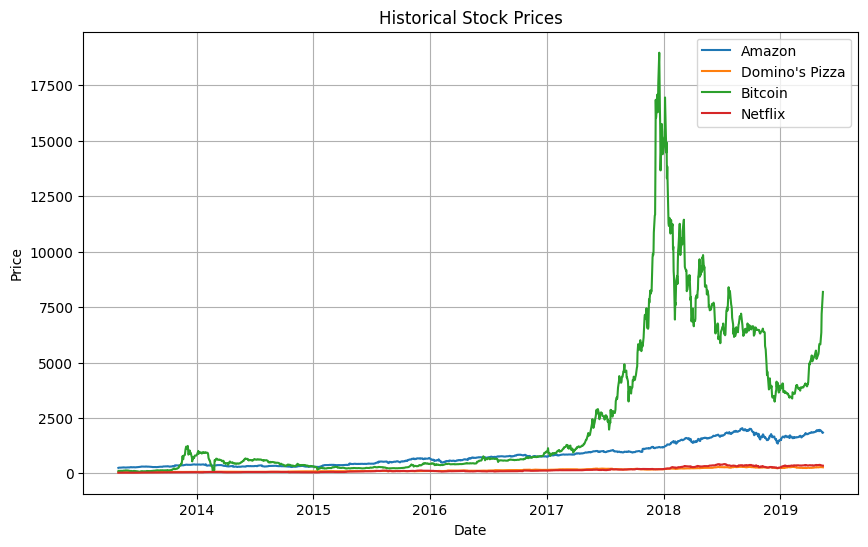

In [12]:
# Plotting each stock price over time
plt.figure(figsize=(10, 6))
plt.plot(portfolio_data['Date'], portfolio_data['AMZN'], label='Amazon')
plt.plot(portfolio_data['Date'], portfolio_data['DPZ'], label="Domino's Pizza")
plt.plot(portfolio_data['Date'], portfolio_data['BTC'], label='Bitcoin')
plt.plot(portfolio_data['Date'], portfolio_data['NFLX'], label='Netflix')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Time Series Decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
# Decomposing each time series
for column in ['AMZN', 'DPZ', 'BTC', 'NFLX']:
    result = seasonal_decompose(portfolio_data[column], model='multiplicative', period=30)

In [30]:
# Plotting the decomposition
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

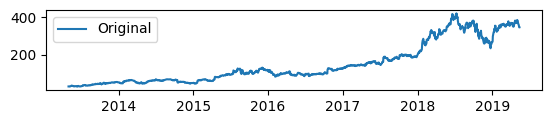

In [31]:
plt.subplot(411)
plt.plot(portfolio_data['Date'], portfolio_data[column], label='Original')
plt.legend()

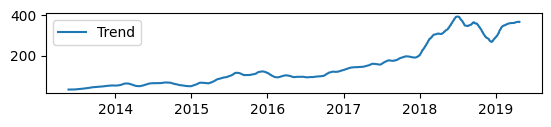

In [33]:
plt.subplot(412)
plt.plot(portfolio_data['Date'], result.trend, label='Trend')
plt.legend()

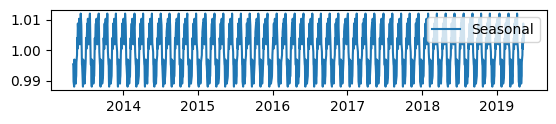

In [34]:
plt.subplot(413)
plt.plot(portfolio_data['Date'], result.seasonal, label='Seasonal')
plt.legend()

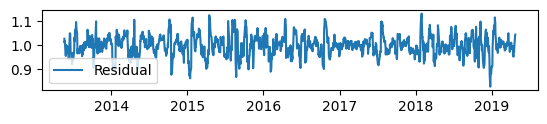

In [35]:
plt.subplot(414)
plt.plot(portfolio_data['Date'], result.resid, label='Residual')
plt.legend()

# Step 4: Statistical Modeling (ARIMA)

ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting method that models the relationship between a time series and its lagged values, differences, and moving averages. It captures both linear trends and seasonality in the data, making it suitable for predicting future values based on historical observations.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
# Fittting ARIMA model for each stock
for column in ['AMZN', 'DPZ', 'BTC', 'NFLX']:
    model = ARIMA(portfolio_data[column], order=(5,1,0))
    model_fit = model.fit()

In [22]:
 # Print model summary
print(f"Summary for {column}:")
print(model_fit.summary())
print("\n\n")

Summary for NFLX:
                               SARIMAX Results                                
Dep. Variable:                   NFLX   No. Observations:                 1520
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4502.287
Date:                Thu, 09 May 2024   AIC                           9016.575
Time:                        06:12:32   BIC                           9048.530
Sample:                             0   HQIC                          9028.472
                               - 1520                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0089      0.014      0.620      0.536      -0.019       0.037
ar.L2          0.0218      0.015      1.464      0.143      -0.007       0.051
ar.L3          0.0610      0.015  

# Step 5: Forecasting

In time series analysis, Forecasting refers to the process of predicting future values of a time series based on historical data patterns.Hence, ARIMA modeling technique is used for forecasting, providing insights for decision-making, planning, and risk management in various fields including finance, economics, and weather forecasting.


In [23]:
# Assuming you want to forecast the next 30 days for each stock
forecast_results = {}

In [25]:
for column in ['AMZN', 'DPZ', 'BTC', 'NFLX']:
    model = ARIMA(portfolio_data[column], order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=30)
    forecast_results[column] = forecast


# Step 6: Visualization

In [77]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [88]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna() # Drop rows with NaN values
    df = df[[col for col in df if df[col].nunique() > 1]] # Keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # Keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # Keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # Reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [85]:
nRowsRead = 1000
df1 = pd.read_csv('portfolio_data.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'portfolio_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [86]:
df1.head(5)

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [92]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

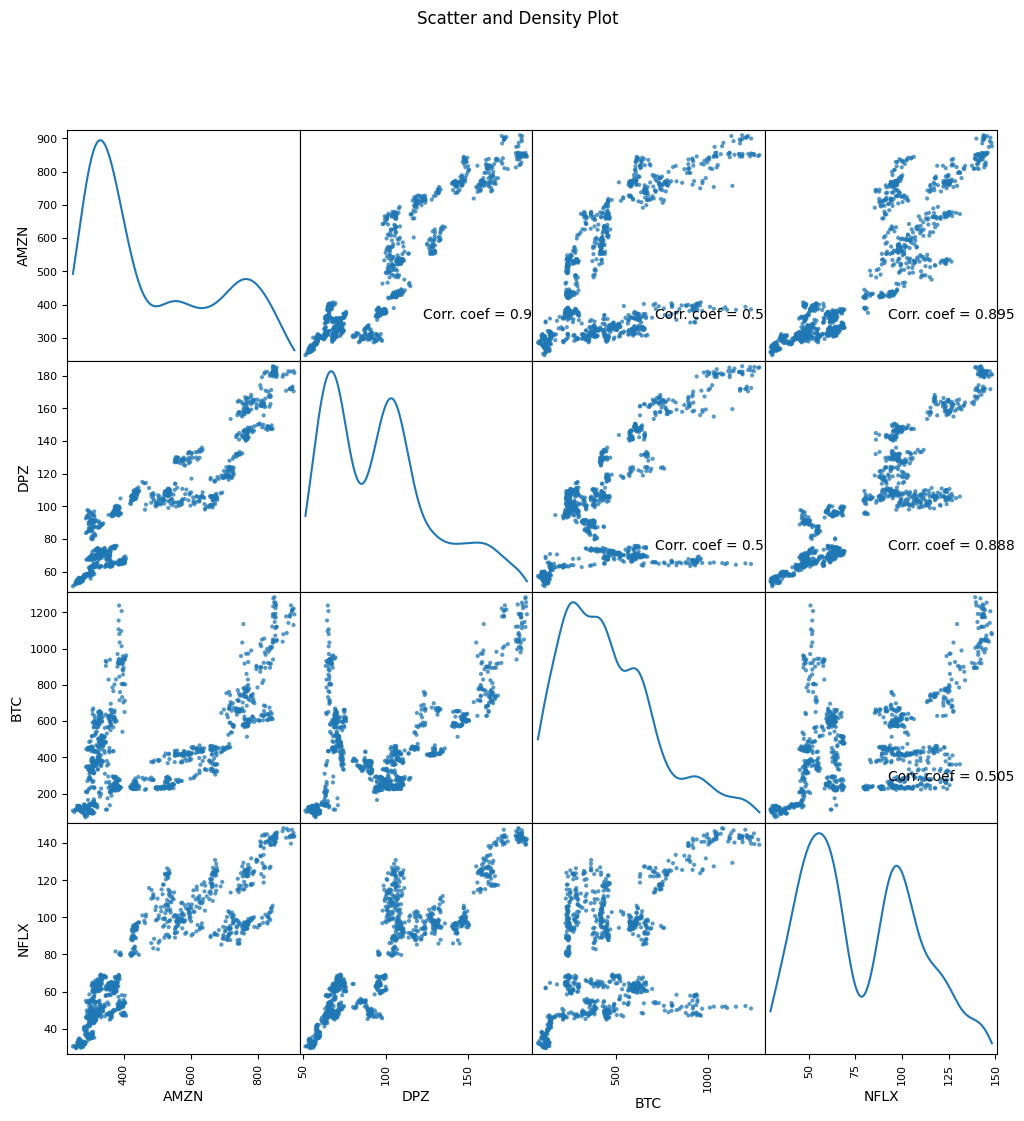

In [90]:
plotScatterMatrix(df1, 12, 10)

In [26]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

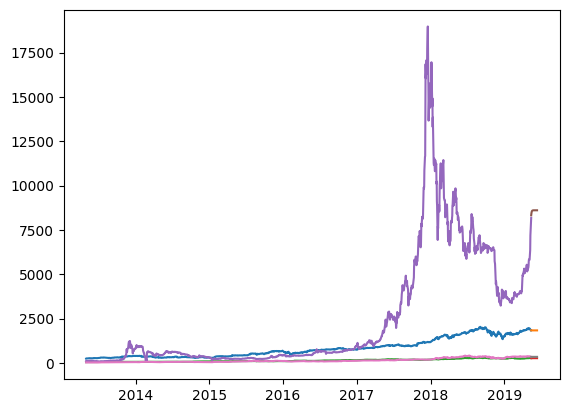

In [28]:
for column, forecast in forecast_results.items():
    plt.plot(portfolio_data['Date'], portfolio_data[column], label = f'Actual {column} Prices')
    plt.plot(pd.date_range(start = portfolio_data['Date'].iloc[-1], periods = 30, freq = 'D'), forecast, label = f'Forecasted {column} Prices')

# **THANK YOU!**